<a href="https://colab.research.google.com/github/DVPCoder2003/118AFInalProjectcode/blob/main/Cogs118A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo --quiet


In [ ]:
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import pprint


In [ ]:
breast_cancer = fetch_ucirepo(id=17)  # Breast Cancer Wisconsin (Diagnostic)

X_bc = breast_cancer.data.features.copy()
y_bc = breast_cancer.data.targets.copy()

print("Breast Cancer shapes:", X_bc.shape, y_bc.shape)
print("\nBreast Cancer target values:\n", y_bc.value_counts())

print("\nBreast Cancer metadata:")
pprint.pp(breast_cancer.metadata)


Breast Cancer shapes: (569, 30) (569, 1)

Breast Cancer target values:
 Diagnosis
B            357
M            212
Name: count, dtype: int64

Breast Cancer metadata:
{'uci_id': 17,
 'name': 'Breast Cancer Wisconsin (Diagnostic)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic',
 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv',
 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 569,
 'num_features': 30,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['Diagnosis'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1993,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C5DW2B',
 'creators': ['William Wolberg',
              'Olvi Mangasarian',
              'Nick Street',
              'W. Street'],
 'intr

In [ ]:
spambase = fetch_ucirepo(id=94)

X_spam = spambase.data.features.copy()
y_spam = spambase.data.targets.copy()

print("Spambase shapes:", X_spam.shape, y_spam.shape)
print("\nSpambase target values:\n", y_spam.value_counts())

print("\nSpambase metadata:")
pprint.pp(spambase.metadata)


Spambase shapes: (4601, 57) (4601, 1)

Spambase target values:
 Class
0        2788
1        1813
Name: count, dtype: int64

Spambase metadata:
{'uci_id': 94,
 'name': 'Spambase',
 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase',
 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv',
 'abstract': 'Classifying Email as Spam or Non-Spam',
 'area': 'Computer Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 4601,
 'num_features': 57,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['Class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1999,
 'last_updated': 'Mon Aug 28 2023',
 'dataset_doi': '10.24432/C53G6X',
 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'],
 'intro_paper': None,
 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements '
                           

In [ ]:
mushroom = fetch_ucirepo(id=73)

X_mush = mushroom.data.features.copy()
y_mush = mushroom.data.targets.copy()

print("Mushroom shapes:", X_mush.shape, y_mush.shape)
print("\nMushroom target values:\n", y_mush.value_counts())

print("\nMushroom metadata:")
pprint.pp(mushroom.metadata)


Mushroom shapes: (8124, 22) (8124, 1)

Mushroom target values:
 poisonous
e            4208
p            3916
Name: count, dtype: int64

Mushroom metadata:
{'uci_id': 73,
 'name': 'Mushroom',
 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom',
 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv',
 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms '
             'of physical characteristics; classification: poisonous or edible',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 8124,
 'num_features': 22,
 'feature_types': ['Categorical'],
 'demographics': [],
 'target_col': ['poisonous'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1981,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5959T',
 'creators': [],
 'intro_paper': None,
 'additional_info': {'summary': 'This data set includes descr

We want all the targets as 0/1, with 0 being the negative class and 1 being the positive class so we have to do some cleanup. For the Breast Cancer dataset, we will habve the Malignant(M) being 1 and Benign(B) being 0. Spambase already has 0/1, so all we have to check if it is an int series. For the Mushroom dataset we will make Poisonous(p) as 1 and Edible(e) as 0.

In [ ]:
# Breast cancer: M -> 1, B -> 0
y_bc_binary = (y_bc['Diagnosis'] == 'M').astype(int)

# Spambase: already binary, but make sure it's an int Series
# y_spam may have a column name like 'class'; we just take the first column
y_spam_binary = y_spam.iloc[:, 0].astype(int)

# Mushroom: p (poisonous) -> 1, e (edible) -> 0
# y_mush usually has a single column like 'class'
y_mush_binary = (y_mush.iloc[:, 0] == 'p').astype(int)

print("Breast Cancer positive rate (malignant):", y_bc_binary.mean())
print("Spambase positive rate (spam):", y_spam_binary.mean())
print("Mushroom positive rate (poisonous):", y_mush_binary.mean())

Breast Cancer positive rate (malignant): 0.37258347978910367
Spambase positive rate (spam): 0.39404477287546186
Mushroom positive rate (poisonous): 0.48202855736090594


In [ ]:
datasets = {
    "breast_cancer": {
        "X": X_bc,
        "y": y_bc_binary,
        "type": "numeric"
    },
    "spambase": {
        "X": X_spam,
        "y": y_spam_binary,
        "type": "numeric"
    },
    "mushroom": {
        "X": X_mush,
        "y": y_mush_binary,
        "type": "categorical"
    }
}


In [ ]:
classifiers = {
    "log_reg": {
        "estimator": LogisticRegression(max_iter=1000, solver="liblinear"),
        "param_grid": {
            "clf__C": [0.01, 0.1, 1, 10, 100]
        }
    },
    "svm_rbf": {
        "estimator": SVC(kernel="rbf"),
        "param_grid": {
            "clf__C": [0.1, 1, 10, 100],
            "clf__gamma": [0.001, 0.01, 0.1, 1]
        }
    },
    "random_forest": {
        "estimator": RandomForestClassifier(random_state=0),
        "param_grid": {
            "clf__n_estimators": [100, 200],
            "clf__max_depth": [None, 5, 10, 20]
        }
    }
}


In [ ]:
#Helper code, esures all the classfiers recieve properly formatted scaled input features
def build_preprocessor(dataset_type, X):
    if dataset_type == "numeric":
        # All columns are numeric
        numeric_features = X.columns
        preprocessor = ColumnTransformer(
            transformers=[
                ("num", StandardScaler(), numeric_features)
            ]
        )
    else:
        # All columns are categorical
        categorical_features = X.columns
        preprocessor = ColumnTransformer(
            transformers=[
                ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
            ]
        )
    return preprocessor


In [ ]:
def build_preprocessor(dataset_type, X):
    if dataset_type == "numeric":
        # All columns are numeric
        numeric_features = X.columns
        preprocessor = ColumnTransformer(
            transformers=[
                ("num", StandardScaler(), numeric_features)
            ]
        )
    else:
        # All columns are categorical
        categorical_features = X.columns
        preprocessor = ColumnTransformer(
            transformers=[
                ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
            ]
        )
    return preprocessor


In [ ]:
split_configs = [
    {"name": "20_80", "train_size": 0.2, "test_size": 0.8},
    {"name": "50_50", "train_size": 0.5, "test_size": 0.5},
    {"name": "80_20", "train_size": 0.8, "test_size": 0.2},
]

trial_seeds = [0, 1, 2]  # three different shuffles

results = []  # we'll append dicts and turn this into a DataFrame


In [ ]:
for dataset_name, ds in datasets.items():
    X = ds["X"]
    y = ds["y"]
    d_type = ds["type"]

    print(f"\n=== DATASET: {dataset_name} ({d_type}) ===")

    for split in split_configs:
        split_name = split["name"]
        train_size = split["train_size"]
        test_size = split["test_size"]

        print(f"\n  Split: {split_name} (train={int(train_size*100)}%, test={int(test_size*100)}%)")

        for seed in trial_seeds:
            print(f"    Trial with random_state={seed}")

            # 1. Outer train-test split
            X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                train_size=train_size,
                test_size=test_size,
                random_state=seed,
                stratify=y
            )

            # Build the appropriate preprocessor for this dataset
            preprocessor = build_preprocessor(d_type, X_train)

            for clf_name, clf_info in classifiers.items():
                base_clf = clf_info["estimator"]
                param_grid = clf_info["param_grid"]

                # 2. Build pipeline: preprocess -> classifier
                pipe = Pipeline(steps=[
                    ("preprocess", preprocessor),
                    ("clf", base_clf)
                ])

                # 3. GridSearchCV on the training set (with 3-fold CV)
                grid = GridSearchCV(
                    estimator=pipe,
                    param_grid=param_grid,
                    cv=3,
                    scoring="accuracy",
                    n_jobs=-1
                )

                grid.fit(X_train, y_train)

                best_model = grid.best_estimator_
                val_acc = grid.best_score_          # mean CV accuracy on training folds
                train_acc = accuracy_score(y_train, best_model.predict(X_train))
                test_acc = accuracy_score(y_test, best_model.predict(X_test))

                # Save results
                results.append({
                    "dataset": dataset_name,
                    "type": d_type,
                    "split": split_name,
                    "train_size": train_size,
                    "test_size": test_size,
                    "trial_seed": seed,
                    "classifier": clf_name,
                    "train_accuracy": train_acc,
                    "val_accuracy": val_acc,
                    "test_accuracy": test_acc,
                    "best_params": grid.best_params_
                })



=== DATASET: breast_cancer (numeric) ===

  Split: 20_80 (train=20%, test=80%)
    Trial with random_state=0
    Trial with random_state=1
    Trial with random_state=2

  Split: 50_50 (train=50%, test=50%)
    Trial with random_state=0
    Trial with random_state=1
    Trial with random_state=2

  Split: 80_20 (train=80%, test=20%)
    Trial with random_state=0
    Trial with random_state=1
    Trial with random_state=2

=== DATASET: spambase (numeric) ===

  Split: 20_80 (train=20%, test=80%)
    Trial with random_state=0
    Trial with random_state=1
    Trial with random_state=2

  Split: 50_50 (train=50%, test=50%)
    Trial with random_state=0
    Trial with random_state=1
    Trial with random_state=2

  Split: 80_20 (train=80%, test=20%)
    Trial with random_state=0
    Trial with random_state=1
    Trial with random_state=2

=== DATASET: mushroom (categorical) ===

  Split: 20_80 (train=20%, test=80%)
    Trial with random_state=0
    Trial with random_state=1
    Trial with

In [ ]:
results_df = pd.DataFrame(results)
results_df.head()


,dataset,type,split,train_size,test_size,trial_seed,classifier,train_accuracy,val_accuracy,test_accuracy,best_params
0,breast_cancer,numeric,20_80,0.2,0.8,0,log_reg,0.964602,0.955903,0.927632,{'clf__C': 0.1}
1,breast_cancer,numeric,20_80,0.2,0.8,0,svm_rbf,0.955752,0.955903,0.936404,"{'clf__C': 10, 'clf__gamma': 0.001}"
2,breast_cancer,numeric,20_80,0.2,0.8,0,random_forest,1.000000,0.920816,0.929825,"{'clf__max_depth': None, 'clf__n_estimators': ..."
3,breast_cancer,numeric,20_80,0.2,0.8,1,log_reg,0.982301,0.973684,0.953947,{'clf__C': 0.01}
4,breast_cancer,numeric,20_80,0.2,0.8,1,svm_rbf,1.000000,0.964912,0.969298,"{'clf__C': 10, 'clf__gamma': 0.01}"


In [ ]:
results_df.to_csv("cogs118a_results_raw.csv", index=False)


In [ ]:
#Find avgs across the 3 trials
group_cols = ["dataset", "split", "classifier"]

summary_df = (
    results_df
    .groupby(group_cols)
    .agg(
        mean_train_acc=("train_accuracy", "mean"),
        mean_val_acc=("val_accuracy", "mean"),
        mean_test_acc=("test_accuracy", "mean")
    )
    .reset_index()
)

summary_df


,dataset,split,classifier,mean_train_acc,mean_val_acc,mean_test_acc
0,breast_cancer,20_80,log_reg,0.976401,0.964754,0.952485
1,breast_cancer,20_80,random_forest,1.000000,0.926426,0.934211
2,breast_cancer,20_80,svm_rbf,0.979351,0.955982,0.955409
3,breast_cancer,50_50,log_reg,0.989437,0.982406,0.968421
4,breast_cancer,50_50,random_forest,0.998826,0.955481,0.954386
5,breast_cancer,50_50,svm_rbf,0.992958,0.982406,0.968421
6,breast_cancer,80_20,log_reg,0.987546,0.978748,0.970760
7,breast_cancer,80_20,random_forest,1.000000,0.958972,0.950292
8,breast_cancer,80_20,svm_rbf,0.993407,0.975103,0.956140
9,mushroom,20_80,log_reg,1.000000,0.998768,0.999385


In [ ]:
summary_df.to_csv("cogs118a_results_summary.csv", index=False)



In [ ]:
results_df[["dataset", "split", "classifier", "trial_seed", "best_params"]].head(10)


,dataset,split,classifier,trial_seed,best_params
0,breast_cancer,20_80,log_reg,0,{'clf__C': 0.1}
1,breast_cancer,20_80,svm_rbf,0,"{'clf__C': 10, 'clf__gamma': 0.001}"
2,breast_cancer,20_80,random_forest,0,"{'clf__max_depth': None, 'clf__n_estimators': ..."
3,breast_cancer,20_80,log_reg,1,{'clf__C': 0.01}
4,breast_cancer,20_80,svm_rbf,1,"{'clf__C': 10, 'clf__gamma': 0.01}"
5,breast_cancer,20_80,random_forest,1,"{'clf__max_depth': None, 'clf__n_estimators': ..."
6,breast_cancer,20_80,log_reg,2,{'clf__C': 0.1}
7,breast_cancer,20_80,svm_rbf,2,"{'clf__C': 100, 'clf__gamma': 0.001}"
8,breast_cancer,20_80,random_forest,2,"{'clf__max_depth': None, 'clf__n_estimators': ..."
9,breast_cancer,50_50,log_reg,0,{'clf__C': 0.1}


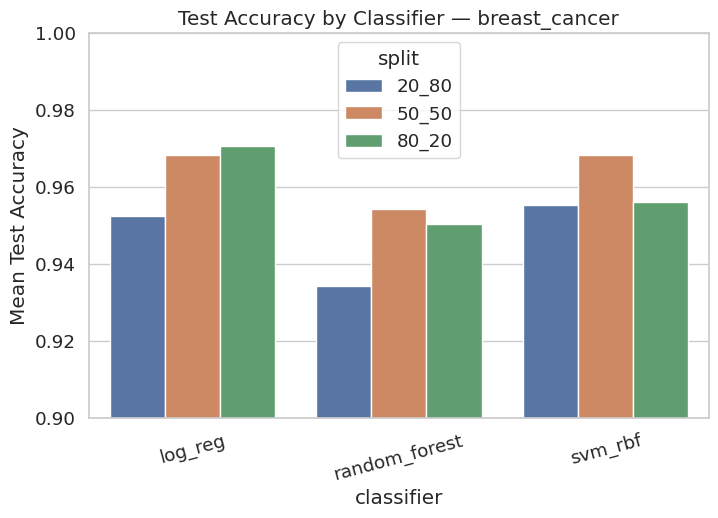

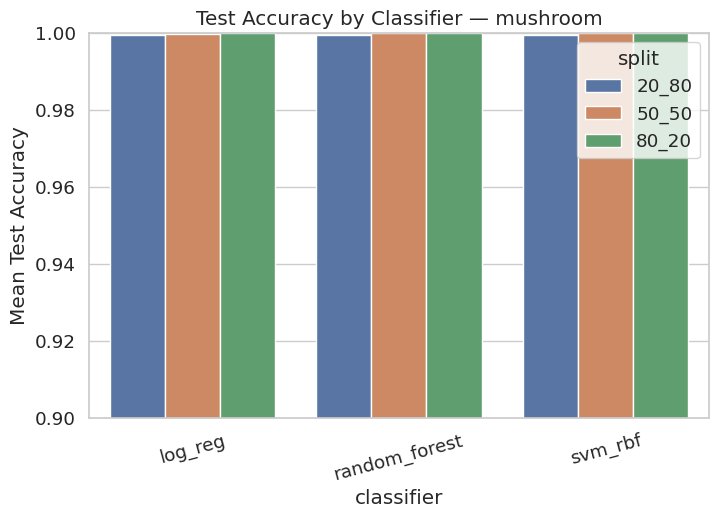

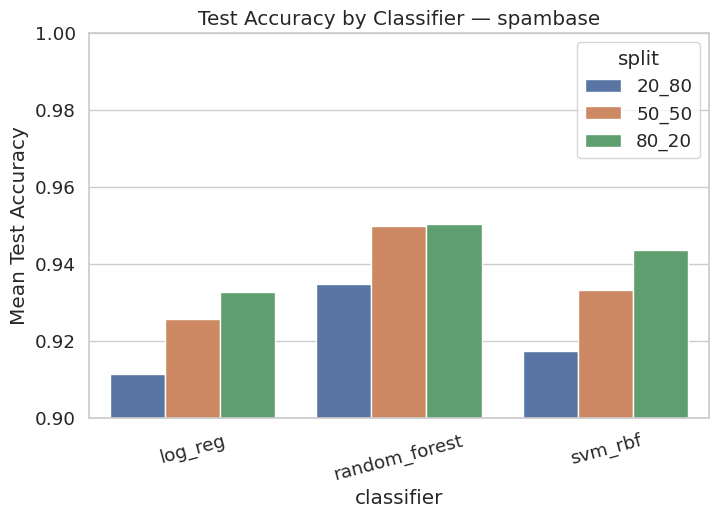

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for dataset in summary_df["dataset"].unique():
    df_temp = summary_df[summary_df["dataset"] == dataset]

    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=df_temp,
        x="classifier",
        y="mean_test_acc",
        hue="split"
    )
    plt.title(f"Test Accuracy by Classifier — {dataset}")
    plt.ylabel("Mean Test Accuracy")
    plt.xticks(rotation=15)

    # Zoom in the y-axis based on your accuracy range
    plt.ylim(0.90, 1.0)

    plt.show()


/tmp/ipython-input-2134653210.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avg = df_temp.groupby("split")["mean_test_acc"].mean().reset_index()
/tmp/ipython-input-2134653210.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avg = df_temp.groupby("split")["mean_test_acc"].mean().reset_index()
/tmp/ipython-input-2134653210.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avg = df_temp.groupby("split

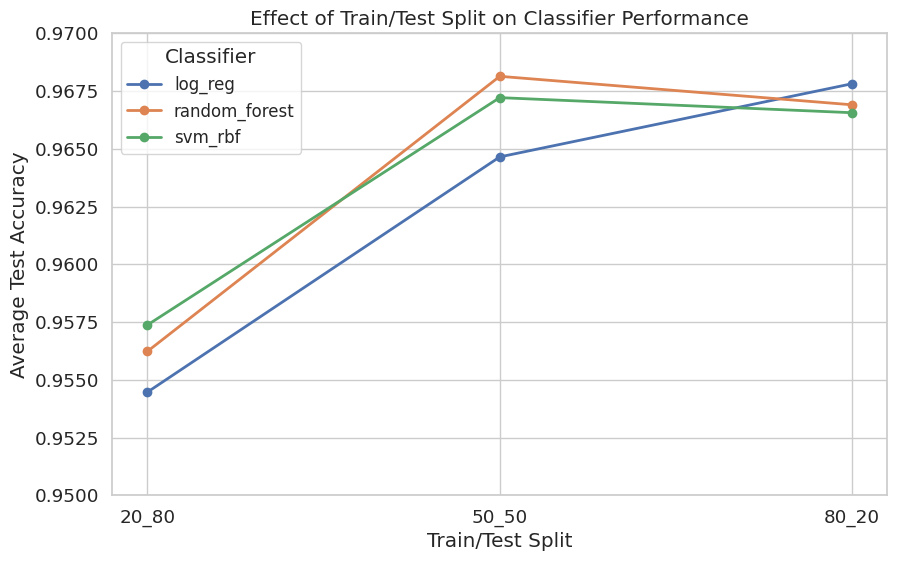

In [ ]:
split_order = ["20_80", "50_50", "80_20"]

plt.figure(figsize=(10,6))

for clf in summary_df["classifier"].unique():
    df_temp = summary_df[summary_df["classifier"] == clf].copy()


    df_temp["split"] = pd.Categorical(df_temp["split"], categories=split_order, ordered=True)


    df_avg = df_temp.groupby("split")["mean_test_acc"].mean().reset_index()

    plt.plot(df_avg["split"], df_avg["mean_test_acc"], marker="o", linewidth=2, label=clf)

plt.title("Effect of Train/Test Split on Classifier Performance")
plt.xlabel("Train/Test Split")
plt.ylabel("Average Test Accuracy")
plt.ylim(0.95, 0.97)
plt.grid(True)


plt.legend(title="Classifier", fontsize=12)

plt.show()


/tmp/ipython-input-3862854595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


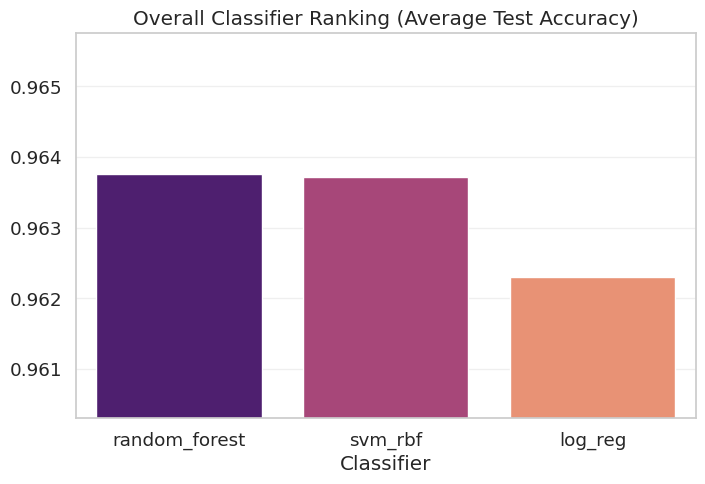

In [ ]:
df_rank = summary_df.groupby("classifier")["mean_test_acc"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=df_rank.sort_values("mean_test_acc", ascending=False),
    x="classifier",
    y="mean_test_acc",
    palette="magma"
)

plt.title("Overall Classifier Ranking (Average Test Accuracy)")


plt.ylabel("")


low = df_rank["mean_test_acc"].min() - 0.002
high = df_rank["mean_test_acc"].max() + 0.002
plt.ylim(low, high)

plt.xlabel("Classifier")
plt.grid(axis="y", alpha=0.3)

plt.show()
